# Mathematical Underpinnings - Lab 4

In [8]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score


import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [2]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

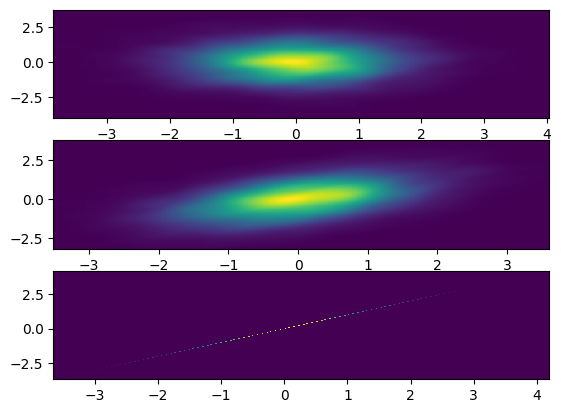

In [ ]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [98]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)
import warnings
warnings.filterwarnings("ignore")
def get_correlation_and_mi(rho):
    n = 5000
    data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
    x = data_2d[:,0]
    y = data_2d[:,1]
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    xt = discretizer.fit_transform(x.reshape(-1, 1)).flatten()
    yt = discretizer.fit_transform(y.reshape(-1, 1)).flatten()
    return [pearsonr(x, y)[0], mutual_info_score(xt, yt)]


In [99]:
get_correlation_and_mi(0.5)

[0.5009566461483537, 0.13785602012643353]

In [100]:
get_correlation_and_mi(0.9)

[0.8990510506708439, 0.6831303296136155]

In [101]:
get_correlation_and_mi(0.1)

[0.07786846522878993, 0.010482194407294358]

#### bp 3)

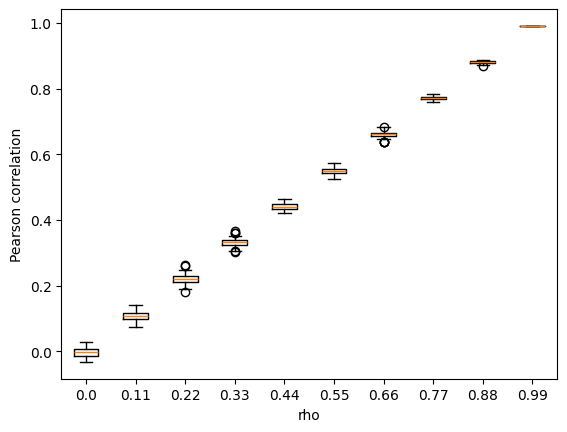

In [102]:
correlation_values = []
mi_values = []
rho_values = np.linspace(0, 0.99, 10)
for rho in rho_values:
    tmp_result = [get_correlation_and_mi(rho) for _ in range(100)]
    correlation_values.append([res[0] for res in tmp_result])
    mi_values.append([res[1] for res in tmp_result])
plt.boxplot(correlation_values, labels=rho_values)
plt.xlabel('rho')
plt.ylabel('Pearson correlation')
plt.show()

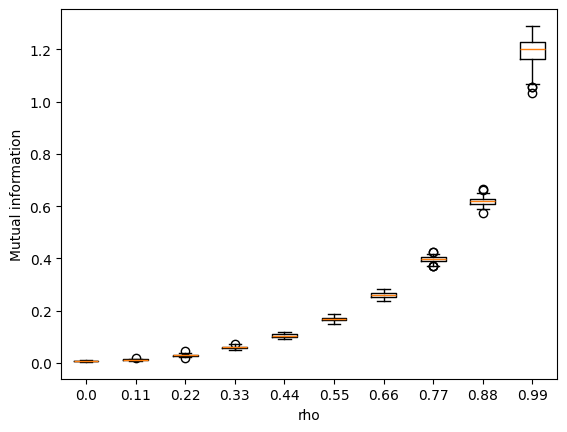

In [103]:
plt.boxplot(mi_values,labels=rho_values)
plt.xlabel('rho')
plt.ylabel('Mutual information')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [104]:
mean_mi = np.mean(mi_values, axis=1)
mean_correlation = np.mean(correlation_values, axis=1)  

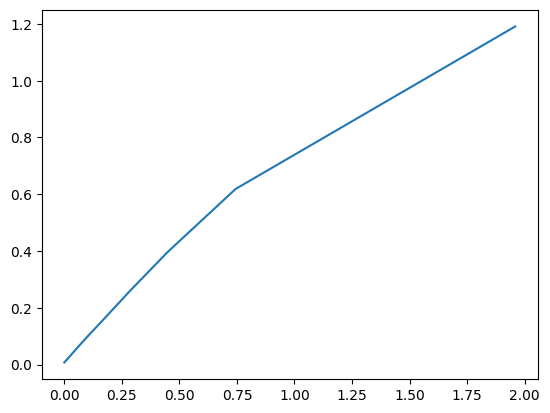

In [105]:
plt.plot(-np.log(1-rho_values**2)/2, mean_mi)

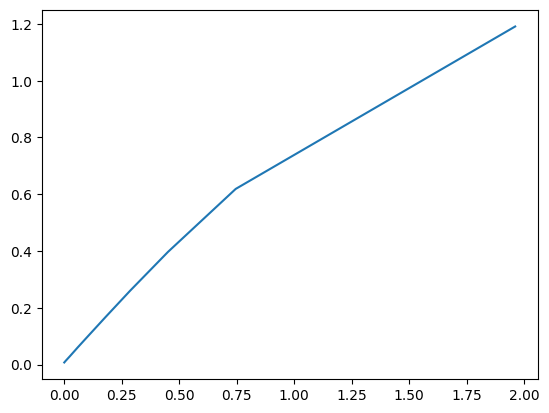

In [106]:
plt.plot(-np.log(1-mean_correlation**2)/2, mean_mi)

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

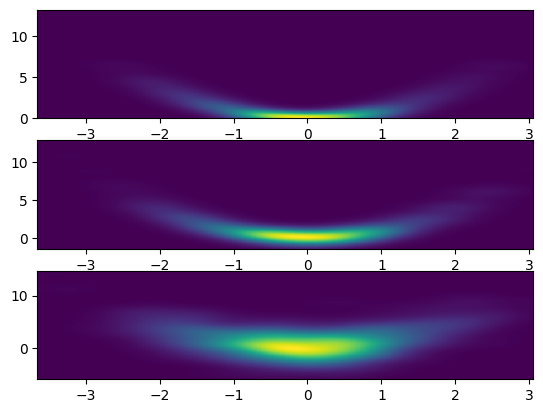

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [82]:
def get_correlation_and_mi2(rho):
    n = 1000
    norm_sample = np.random.normal(0, 1, n)
    data_2d = np.array([norm_sample, norm_sample**2 + np.random.normal(0, rho, n)]).T
    x = data_2d[:,0]
    y = data_2d[:,1]
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    xt = discretizer.fit_transform(x.reshape(-1, 1)).flatten()
    yt = discretizer.fit_transform(y.reshape(-1, 1)).flatten()
    return [pearsonr(x, y)[0], mutual_info_score(xt, yt)]

In [83]:
get_correlation_and_mi2(0.5)

[0.025396542701885204, 0.6024231443777645]

In [90]:
get_correlation_and_mi2(2)

[0.04984394401086052, 0.17877130586027698]

In [85]:
get_correlation_and_mi2(0.1)

[0.050501804261344464, 0.7236986371932601]

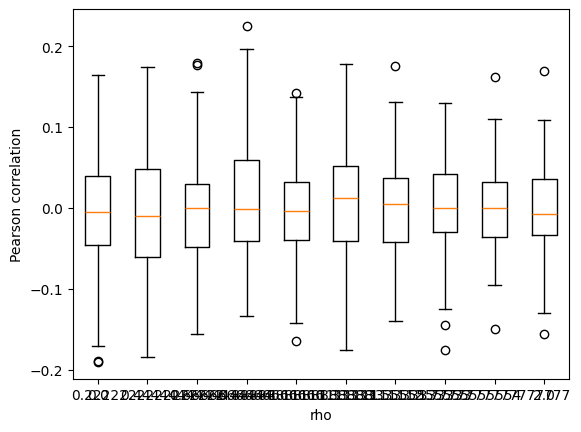

In [96]:
correlation_values = []
mi_values = []
rho_values = np.linspace(0, 2, 10)
for rho in rho_values:
    tmp_result = [get_correlation_and_mi2(rho) for _ in range(100)]
    correlation_values.append([res[0] for res in tmp_result])
    mi_values.append([res[1] for res in tmp_result])
plt.boxplot(correlation_values, labels=rho_values)
plt.xlabel('rho')
plt.ylabel('Pearson correlation')
plt.show()

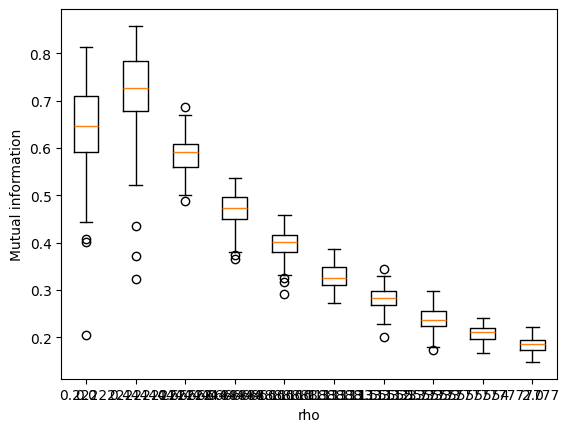

In [97]:
plt.boxplot(mi_values,labels=rho_values)
plt.xlabel('rho')
plt.ylabel('Mutual information')
plt.show()

## Task 2

### a)

In [94]:
def asymptotic_indenpendence(X,Y,stats):
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform',subsample=None)
    Xt = discretizer.fit_transform(X.reshape(-1, 1)).flatten()
    Yt = discretizer.fit_transform(Y.reshape(-1, 1)).flatten()
    if stats == 'mi':
        stat = 2*len(X)*mutual_info_score(Xt, Yt)
    if stats == 'chi2':
        stat = chi2_contingency(pd.crosstab(Xt, Yt))[0]
    dof = (len(np.unique(Xt))-1)*(len(np.unique(Yt))-1)
    return stat,chi2.sf(stat, dof)


### b)

In [72]:
def permutation_test(X,Y,B):
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform',subsample=None)
    Xt = discretizer.fit_transform(X.reshape(-1, 1)).flatten()
    Yt = discretizer.fit_transform(Y.reshape(-1, 1)).flatten()
    stat = mutual_info_score(Xt, Yt)
    indicator_sum = 0
    for _ in range(B):
        Xbt = np.random.permutation(Xt)
        stat_b= mutual_info_score(Xbt, Yt)
        indicator_sum += stat_b >= stat
    return 2*len(X)*stat, (1+indicator_sum)/(B+1)


### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [95]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)

print(f'Asymptotic independence test based on mutual information : {asymptotic_indenpendence(X,Y,"mi")}')
print(f'Asymptotic independence test based on Pearson’s chi-square statistic : {asymptotic_indenpendence(X,Y,"chi2")}')
print(f'Permutation test: {permutation_test(X,Y,100)}')



Asymptotic independence test based on mutual information : (69.08895016003261, 0.8245897261406885)
Asymptotic independence test based on Pearson’s chi-square statistic : (69.8830101372409, 0.8061781601672078)
Permutation test: (69.08895016003261, 0.7623762376237624)


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [96]:
# dependent r.v. - ideally we will reject the null hypothesis
n = 1000
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
X = data_2d[:,0]
Y = data_2d[:,1]
print(f'Asymptotic independence test based on mutual information : {asymptotic_indenpendence(X,Y,"mi")}')
print(f'Asymptotic independence test based on Pearson’s chi-square statistic : {asymptotic_indenpendence(X,Y,"chi2")}')
print(f'Permutation test: {permutation_test(X,Y,100)}')



Asymptotic independence test based on mutual information : (325.1511857763511, 5.514690405817352e-31)
Asymptotic independence test based on Pearson’s chi-square statistic : (491.8624761455873, 3.953155498077602e-60)
Permutation test: (325.1511857763511, 0.009900990099009901)
